         PC1       PC2
0  -1.451346  1.538419
1  -1.481271  1.492883
2  -1.467007  1.402951
3  -1.420051  1.375513
4  -1.441651  1.428429
..       ...       ...
71  6.279505 -1.638657
72  5.961703 -1.561456
73  6.640976 -1.557032
74  6.030425 -1.616472
75  5.853485 -1.578560

[76 rows x 2 columns]


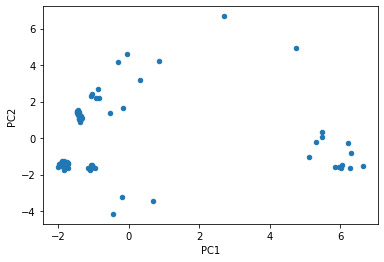

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterB_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


PC1       PC2  Cluster
0  -1.451346  1.538419        2
1  -1.481271  1.492883        2
2  -1.467007  1.402951        2
3  -1.420051  1.375513        2
4  -1.441651  1.428429        2
..       ...       ...      ...
71  6.279505 -1.638657        3
72  5.961703 -1.561456        3
73  6.640976 -1.557032        3
74  6.030425 -1.616472        3
75  5.853485 -1.578560        3

[76 rows x 3 columns]

In [5]:
km.cluster_centers_

array([[-1.46192961, -1.69148421],
       [-0.92765642,  1.95406452],
       [ 5.81069975, -0.49603888]])

No handles with labels found to put in legend.


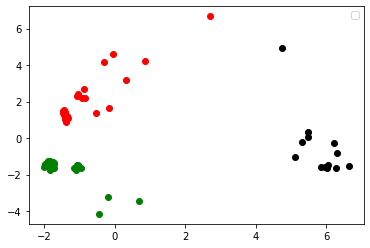

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[891.9116790308364,
 355.92605185442187,
 144.7841819522307,
 68.86453372761598,
 48.147295664397355,
 28.60995091141206,
 22.411294004784235,
 16.78323081354883,
 12.625528928517491]

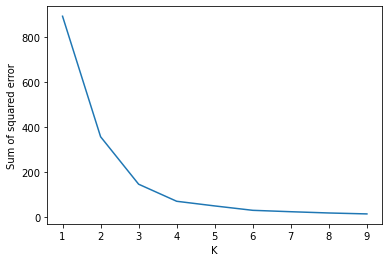

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) # choose k = 3